# NBA Playoffs

This project uses data from `basketball-reference.com` to ask questions about NBA players, who makes it to the playoffs, and how they perform once they get there.

### Getting the data

* The yearly data on all players for the regular season year `20XX` is found at the url:
```
https://www.basketball-reference.com/leagues/NBA_20XX_totals.html
```
* The yearly playoff data on all players in the playoffs for the year `20XX` is found at the url:
```
https://www.basketball-reference.com/playoffs/NBA_20XX_totals.html
```


---
# Summary of Findings


## Introduction
---
I am working with a dataset that contain's player statistics from each team in the NBA from 2012-2018. It contains the data of each player from their team, age, and all types of in-game statistics. My question relates to one position in particular, and how centers perform in the regular season compared to the playoffs. Before diving into my hypothesis test, I first joined the tables of regular season player data and playoff player data. Then I cleaned certain columns and added new columns that would be convenient for data and missingness analysis later on. I also selected certain columns to conduct data analysis and to find general trends across the years.

I was met with a few roadblocks, such as not having win data for each team during each season, or not considering enough statistics when testing to see if centers performed better in the playoffs. Overall, I was able to effectively clean my data and perform data analysis and hypothesis tests.



### Results of Cleaning and EDA:
---

First off, as I pulled the data from the url, I made each year's player data into separate dataframes, and appended a column to them that would clearly indicate which year each dataset came from. Then I appended each year's data into one table, for both regular season and playoffs. My next step was to join these two tables containing 6 years worth of data, and I differentiated the regular season and playoff by appending separate suffixes to their column names. I then saved them as local files so as to not repeatedly pull data from the website. I also made sure to do a left join, so that all the players in the regular season are included.

As I started cleaning the data, I dropped a few useless columns and reset the indices. I dropped the rows that contained column names, which were formed when appending the dataframes by rows. The most tedious part was changing all the corresponding column data types to either integer or floats, because they came in as strings but I needed integers to work with.

My data exploration starts with looking at the average field goal percentage by each position. I found that centers have the highest field goal percentage, at 52%, which is slightly higher than all other positions. This is most likely because centers take more high percentage shots like shots in the key or dunks.

Next, I looked the field goal percentage by team from during the regular season versus the playoffs. I found that only 4 teams had a higher field goal percentage in the playoffs than durin the regular season, which was not what I expected as usually teams play harder and better during the playoffs.

Finally, I looked at the total points scored by each team throughout the years. I found that each team increased their points made by around 2000 points through 6 years. This could be due to more teams shooting 3's and increasing their offensive game.

### Results of Missingness:
---
After examining both the regular season and playoffs datasets for 2012-2018 for missingness, there were two main sources of missingness. I found that the first major type of missingness is missing shot made/attempted percentages . When you examine the tables separately, these missing values are visible in the shot percentage columns. It includes field goal, 2 pointers, 3 pointers, free throws, and eFG, or effective field goal percentages. These missing percentages can be attributed to that certain players never took 3 pointers or free throwsduring the season, leading to a 0 for 0 shots made / attempted rate. Since any number divided by 0 is undefined, those values by default nan or missing. I did, however, consider that some players also had null shot percentages because they didn't play games that season, which evidently means they couldn't have taken any shots.

I found that the second type of missingness is the reason that not all teams make it to the playoffs. Only 16 of the 30 teams can make it to the playoffs each year. This fact accounts for a majority of the missing values in the joined table, since around half of the players couldn't make it into the playoffs. Since that player does not exist on the playoff roster, many of their stats such as games, types of shots made/attempted, and in game stats such as blocks and turnovers are all null. I considered that around the proportion of players missing is around the same to the proportion of teams that did not make the playoffs.

These were ultimately the two major types of missing data in this dataset. There were no permutation tests that were required. I assessed both the missing data as Missing at Random. The first type is MAR conditional on the shots attempted for that shot type. The second type is MAR conditional on the column that indicates whether or not they made it to the playoffs.

### Results of Hypothesis Test
---
I asked the question of whether or not centers overperform in the playoffs compared to the regular season. I arrived at this question because I thought centers go unnoticed when they don't make highlights, but they're still putting up big numbers. My null hypothesis stated that centers perform at a similar level in the playoffs versus the regular reason. My alternative hypothesis implied that centers performed better in the playoffs.

I created my test statistic of sampling 10 centers from both the regular season and playoff, and then calculating their difference in means. 

To simulate my hypothesis, I generated data under my null hypothesis 10000 times and calculated the difference of means for each sample. In the end, I found a p-value of 0.368, which is much higher than my significance level of 0.05. I concluded that I fail to reject the null hypothesis, and I could not find a correlation that centers perform better in the playoffs.


### Improvements to Data
---
Some improvements to my data analysis could be the inclusion of win data for each team throughout the years. I want to see how many games each team won for each year, and see how that translates into how they make it into the playoffs and perform there. I know that the 16 teams with the top win rate enter the playoffs, but it's not always the top seed that win the championship. So I want to explore win rates along with individual player data to assess their performance in the regular season compared to the playoffs.

# My Code

In [3]:
%matplotlib inline
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Cleaning and EDA:
---

In [4]:
#pulling regular season and playoff data from 2012-2018
regular_dfs = []
playoff_dfs = []
joined_dfs = []
for i in range(12, 19):
    regular_df = pd.read_html('https://www.basketball-reference.com/leagues/NBA_20%s_totals.html' % (str(i)))[0]
    playoff_df = pd.read_html('https://www.basketball-reference.com/playoffs/NBA_20%s_totals.html' % (str(i)))[0]
    
    #keeping track of the year from each year's dataset
    regular_df['Year'] = ('20%s' % (str(i))) 
    playoff_df['Year'] = ('20%s' % (str(i))) 
    
    #joining regular season and playoff data by year
    joined = regular_df.merge(playoff_df, on='Player', how='left', suffixes=('_reg', '_poff'))
    
    regular_dfs.append(regular_df)
    playoff_dfs.append(playoff_df)
    joined_dfs.append(joined)

#saving as local files so as to not request from url too many times
final_regular = pd.concat(regular_dfs).to_csv('regular.csv')
final_playoff = pd.concat(playoff_dfs).to_csv('playoff.csv')

#joined tables of regular season and playoffs joined together
joined_byyear = pd.concat(joined_dfs).to_csv('joined.csv')

In [4]:
regular = pd.read_csv('regular.csv')
playoff = pd.read_csv('playoff.csv')
joined = pd.read_csv('joined.csv')

In [6]:
#dropping rows that contain columns names, as well as unnecessary columns
indexNames = joined[joined['Rk_reg'] == 'Rk'].index
joined.drop(indexNames , inplace=True)
joined = joined.drop(columns=['Unnamed: 0'])
joined = joined.drop(columns=['Rk_poff'])

In [7]:
#resetting indices
joined.reset_index()

#cleaning the data types of each column
#I changed many column data types to ints or floats

joined['Rk_reg'] = pd.to_numeric(joined['Rk_reg'])
joined['Age_reg'] = pd.to_numeric(joined['Age_reg'])
joined['G_reg'] = pd.to_numeric(joined['G_reg'])
joined['GS_reg'] = pd.to_numeric(joined['GS_reg'])
joined['MP_reg'] = pd.to_numeric(joined['MP_reg'])
joined['FG_reg'] = pd.to_numeric(joined['FG_reg'])
joined['FGA_reg'] = pd.to_numeric(joined['FGA_reg'])
joined['FG%_reg'] = pd.to_numeric(joined['FG%_reg'])
joined['3P_reg'] = pd.to_numeric(joined['3P_reg'])
joined['3PA_reg'] = pd.to_numeric(joined['3P_reg'])
joined['3P%_reg'] = pd.to_numeric(joined['3P%_reg'])
joined['2P_reg'] = pd.to_numeric(joined['2P_reg'])
joined['2PA_reg'] = pd.to_numeric(joined['2PA_reg'])
joined['2P%_reg'] = pd.to_numeric(joined['2P%_reg'])
joined['eFG%_reg'] = pd.to_numeric(joined['eFG%_reg'])
joined['FT_reg'] = pd.to_numeric(joined['FT_reg'])
joined['FTA_reg'] = pd.to_numeric(joined['FTA_reg'])
joined['FT%_reg'] = pd.to_numeric(joined['FT%_reg'])
joined['ORB_reg'] = pd.to_numeric(joined['ORB_reg'])
joined['DRB_reg'] = pd.to_numeric(joined['DRB_reg'])
joined['TRB_reg'] = pd.to_numeric(joined['TRB_reg'])
joined['AST_reg'] = pd.to_numeric(joined['AST_reg'])
joined['STL_reg'] = pd.to_numeric(joined['STL_reg'])
joined['BLK_reg'] = pd.to_numeric(joined['BLK_reg'])
joined['TOV_reg'] = pd.to_numeric(joined['TOV_reg'])
joined['PF_reg'] = pd.to_numeric(joined['PF_reg'])
joined['PTS_reg'] = pd.to_numeric(joined['PTS_reg'])

joined['Age_poff'] = pd.to_numeric(joined['Age_poff'])
joined['G_poff'] = pd.to_numeric(joined['G_poff'])
joined['GS_poff'] = pd.to_numeric(joined['GS_poff'])
joined['MP_poff'] = pd.to_numeric(joined['MP_poff'])
joined['FG_poff'] = pd.to_numeric(joined['FG_poff'])
joined['FGA_poff'] = pd.to_numeric(joined['FGA_poff'])
joined['FG%_poff'] = pd.to_numeric(joined['FG%_poff'])
joined['3P_poff'] = pd.to_numeric(joined['3P_poff'])
joined['3PA_poff'] = pd.to_numeric(joined['3P_poff'])
joined['3P%_poff'] = pd.to_numeric(joined['3P%_poff'])
joined['2P_poff'] = pd.to_numeric(joined['2P_poff'])
joined['2PA_poff'] = pd.to_numeric(joined['2PA_poff'])
joined['2P%_poff'] = pd.to_numeric(joined['2P%_poff'])
joined['eFG%_poff'] = pd.to_numeric(joined['eFG%_poff'])
joined['FT_poff'] = pd.to_numeric(joined['FT_poff'])
joined['FTA_poff'] = pd.to_numeric(joined['FTA_poff'])
joined['FT%_poff'] = pd.to_numeric(joined['FT%_poff'])
joined['ORB_poff'] = pd.to_numeric(joined['ORB_poff'])
joined['DRB_poff'] = pd.to_numeric(joined['DRB_poff'])
joined['TRB_poff'] = pd.to_numeric(joined['TRB_poff'])
joined['AST_poff'] = pd.to_numeric(joined['AST_poff'])
joined['STL_poff'] = pd.to_numeric(joined['STL_poff'])
joined['BLK_poff'] = pd.to_numeric(joined['BLK_poff'])
joined['TOV_poff'] = pd.to_numeric(joined['TOV_poff'])
joined['PF_poff'] = pd.to_numeric(joined['PF_poff'])
joined['PTS_poff'] = pd.to_numeric(joined['PTS_poff'])



In [15]:
final_cleaned = joined.to_csv('final.csv')

In [17]:
df = pd.read_csv('final.csv')
df

,Unnamed: 0,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,...,ORB_poff,DRB_poff,TRB_poff,AST_poff,STL_poff,BLK_poff,TOV_poff,PF_poff,PTS_poff,Year_poff
0,0,1,Jeff Adrien,PF,25,HOU,8,0,63,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Arron Afflalo,SG,26,DEN,62,62,2086,329,...,5.0,20.0,25.0,19.0,5.0,2.0,9.0,14.0,76.0,2012.0
2,2,3,Blake Ahearn,PG,27,UTA,4,0,30,4,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,2012.0
3,3,4,Solomon Alabi,C,23,TOR,14,0,122,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Cole Aldrich,C,23,OKC,26,0,173,22,...,5.0,8.0,13.0,0.0,0.0,0.0,0.0,3.0,10.0,2012.0
5,5,6,LaMarcus Aldridge,PF,26,POR,55,55,1994,483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,7,Lavoy Allen,PF,22,PHI,41,15,624,79,...,21.0,38.0,59.0,3.0,10.0,11.0,5.0,30.0,75.0,2012.0
7,7,8,Ray Allen*,SG,36,BOS,46,42,1565,226,...,8.0,66.0,74.0,18.0,17.0,2.0,17.0,41.0,192.0,2012.0
8,8,9,Tony Allen,SG,30,MEM,58,57,1525,210,...,8.0,14.0,22.0,5.0,9.0,7.0,10.0,21.0,48.0,2012.0
9,9,10,Morris Almond,SG,26,WAS,4,0,67,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploring the Data

This plot shows the the field goal percentage average by each position in basketball. You can see that centers have the highest field goal percentage because they take more shots in the key or take high percentage shots like dunks.

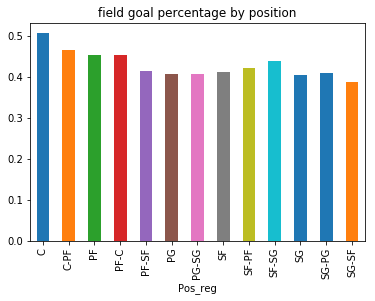

In [260]:
#field goal percentage by position
joined.groupby('Pos_reg')['FG%_reg'].mean().plot(kind='bar', title='field goal percentage by position')

This bar graph compares side by side the average field-goal percentages by each team from during the regular season versus the playoffs. There is no evident correlation that a team's field goal percentage is higher during playoffs.

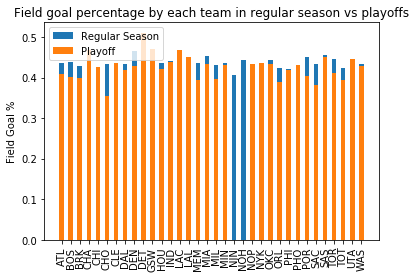

In [349]:
#average field goal percentages by team in regular season vs playoffs
regular_fg = joined.groupby('Tm_reg')['FG%_reg'].mean()
playoff_fg = joined.groupby('Tm_reg')['FG%_poff'].mean()

width = .5
plt.bar(regular_fg.index, regular_fg.values, width, label='Regular Season', align='center')
plt.bar(playoff_fg.index, playoff_fg.values, width, label='Playoff', align = 'center')

plt.ylabel('Field Goal %')
plt.title('Field goal percentage by each team in regular season vs playoffs')

plt.legend(loc='best')

plt.xticks(rotation=90)
plt.show()

This pivot table shows the total points made by each team from 2012 to 2018. Some teams have null values because their team name was changed. You can see a general trend that teams have scored more every year.

In [367]:
#total points made by each team from 2012-2018
pyt = joined[['Tm_reg', 'Year_reg', 'PTS_reg']]
points_years_team = pyt.pivot_table('PTS_reg', index= 'Tm_reg', columns = 'Year_reg', aggfunc = np.sum)
points_years_team.head()

Year_reg,2012,2013,2014,2015,2016,2017,2018
Tm_reg,,,,,,,
ATL,6375.0,8032.0,8282.0,8409.0,8433.0,8459.0,8475.0
BOS,6062.0,7818.0,7892.0,8312.0,8669.0,8857.0,8529.0
BRK,NaN,7944.0,8079.0,8038.0,8089.0,8673.0,8741.0
CHA,5739.0,7661.0,7942.0,NaN,NaN,NaN,NaN
CHI,6359.0,7641.0,7680.0,8265.0,8335.0,8435.0,8440.0


This aggregate table shows the maxiumum, minimum, and median of each team's age, and free throws and turnovers during the regular season and the playoffs.


In [368]:
joined.groupby('Tm_reg').agg(['max', 'min', 'median'])[['Age_reg', 'FT_reg', 'TOV_reg','FT_poff', 'TOV_poff']].head()

Age_reg            FT_reg            TOV_reg            FT_poff       \
           max min median    max min median     max min median     max  min   
Tm_reg                                                                        
ATL         37  20   27.0    318   0   49.0     258   0   42.0    58.0  0.0   
BOS         36  19   26.0    590   0   42.0     220   0   44.0   110.0  0.0   
BRK         38  19   26.0    317   0   47.0     218   0   45.0    39.0  0.0   
CHA         35  19   26.0    296   0   49.0     200   0   40.0    14.0  0.0   
CHI         38  19   26.0    585   0   48.5     194   0   53.0    59.0  0.0   

              TOV_poff              
       median      max  min median  
Tm_reg                              
ATL       7.0     43.0  0.0    6.0  
BOS       7.0     72.0  0.0    5.5  
BRK       8.0     27.0  0.0    5.0  
CHA       4.5     15.0  0.0    4.0  
CHI       4.0     38.0  0.0    6.5

I also left all the null values as is because their missingness cannot simply be replaced with 0 or be imputed, but it is explained in more detail in the missingness section below.

### Missingness:
---

In [5]:
#checking missing values in combined dataframe
(joined.isnull().sum()).head()

Unnamed: 0    0
Rk_reg        0
Player        0
Pos_reg       0
Age_reg       0
dtype: int64

From the table below, we can see two distinct types of missingness. The first type of missingness is missing percentages. This missingness is present when you look at regular season and playoff tables separately. These include field goal, 2 pointers, 3 pointers, free throws, and eFG, or effective field goal percentages. These missing percentages can be explained by the fact that certain players never attempted shots during the season, which means that they technically have a 0 made for 0 attempted rate. Since any number divided by 0 is undefined, those values are missing. These missing values in these columns are dependent on the field goals attempted, 2 pointers attempted, 3 pointers attempted, and free throws attempted columns (FGA, 3PA, 2PA, FTA). 

Although field goals encompass both 2 pointers and 3 pointers, each individual type of shot can contain a value of 0. (Ex. A player can make plenty of 2 pointers but not attempt any 3 pointers)

If any of values for each type of shot contain 0 attempts for any player, it would lead to a missing value in the respective percentage columns for that type of shot. 

For example, we can see that during the regular season, there were 22 players that didn't attempt a single field goal. There were 538 players that didn't attempt a 3 pointer, and 210 players that didn't attempt a free throw.

To conclude, the first type of missingness is **Missing at Random**. There were 5 different sets of columns with missing data: <br>

FG%_reg / FG%_poff - **MAR conditional** on FGA_reg / FGA_poff <br>
3P%_reg / 3P%_poff - **MAR conditional** on 3PA_reg / 3PA_poff <br>
2P%_reg / 2P%_poff - **MAR conditional** on 2PA_reg / 2PA_poff <br>
eFG%_reg / eFG%_poff - **MAR conditional** on 3P% and 2P% <br>
FT%_reg / FT%_poff - **MAR conditional** on FTA_reg / FTA_poff <br>


The only exception to the claim that missing percentages that are dependent on the attempted shots are these players, who only played 1-2 games, and in each of those games had 0 minutes played. This, of course, means that they weren't able to attempt any type of shot, leading to missing values in all the shot percentages.

In [373]:
joined.loc[joined['MP_reg'] == 0]

,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,FG%_reg,3P_reg,3PA_reg,3P%_reg,2P_reg,2PA_reg,2P%_reg,eFG%_reg,FT_reg,FTA_reg,FT%_reg,ORB_reg,DRB_reg,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg,Year_reg,Pos_poff,Age_poff,Tm_poff,G_poff,GS_poff,MP_poff,FG_poff,FGA_poff,FG%_poff,3P_poff,3PA_poff,3P%_poff,2P_poff,2PA_poff,2P%_poff,eFG%_poff,FT_poff,FTA_poff,FT%_poff,ORB_poff,DRB_poff,TRB_poff,AST_poff,STL_poff,BLK_poff,TOV_poff,PF_poff,PTS_poff,Year_poff,Made Playoffs
1134,211,Damion James,SF,25,BRK,2,0,0,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN,0,1,1,0,0,0,0,0,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [374]:
joined.loc[joined['MP_poff'] == 0]

,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,FG%_reg,3P_reg,3PA_reg,3P%_reg,2P_reg,2PA_reg,2P%_reg,eFG%_reg,FT_reg,FTA_reg,FT%_reg,ORB_reg,DRB_reg,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg,Year_reg,Pos_poff,Age_poff,Tm_poff,G_poff,GS_poff,MP_poff,FG_poff,FGA_poff,FG%_poff,3P_poff,3PA_poff,3P%_poff,2P_poff,2PA_poff,2P%_poff,eFG%_poff,FT_poff,FTA_poff,FT%_poff,ORB_poff,DRB_poff,TRB_poff,AST_poff,STL_poff,BLK_poff,TOV_poff,PF_poff,PTS_poff,Year_poff,Made Playoffs
617,382,Josh Selby,PG,20,MEM,28,0,237,25,72,0.347,2,2,0.133,23,57,0.404,0.361,11,14,0.786,2,13,15,30,7,0,29,17,63,2012,PG,20.0,MEM,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0,True
2163,329,Nemanja Nedovic,SG,22,GSW,24,0,142,8,39,0.205,3,3,0.167,5,21,0.238,0.244,7,8,0.875,3,12,15,13,0,1,13,13,26,2014,SG,22.0,GSW,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2014.0,True


The second type of missingness can be attributed to the fact that not all teams make it to the playoffs. Of the 30 teams in the NBA, 8 teams from both the West and the East, or a total of 16 teams make it to the playoffs. This alone accounts for a majority of the missing values in the joined table. Since that player physically cannot play any playoff games, many of their stats such as games, types of shots made/attempted, and in game stats such as blocks and turnovers are all null.

For example, the below code shows the number of players who didn't make playoffs in 2012. I also created a boolean column to show whether or not the player made it into the playoffs.

In [375]:
#create a boolean column to see if the player made it into the playoffs or not
joined['Made Playoffs'] = np.where(joined['Pos_poff'].isna(), False, True)

In [376]:
#seeing how many people did not make playoffs in 2012
not_in_playoffs = joined.loc[(joined['Year_reg'] == 2012) & (joined['G_poff'].isnull())]
not_in_playoffs.groupby('Player').count().shape[0]

274

As you can see here, the proportion of players who didn't make playoffs in 2012 over all the players in the regular season of 2012 is approximately equal to the proportion of (30-16) / 30 teams worth of players. The discrepancy can be attributed to the fact that some players moved from regular season teams that didn't make playoffs to teams that did make playoffs in the middle of the season.

In [377]:
regular_2012 = joined.loc[joined['Year_reg'] == 2012].groupby('Player').count().shape[0]
not_in_playoffs.groupby('Player').count().shape[0] / regular_2012

0.5732217573221757

To conclude, the second type of missingness is **Missing at Random**. The missingness of a player who didn't make the playoffs in all their stat columns is conditional on the "Made Playoffs" column. This means that if the "Made Playoffs" value is False, then all their stats would be null. If the value is True, then their stats are not null.

I've chosen to let these values remain null because they cannot replaced by any other value, since that player did not exist in playoffs.

### Hypothesis Test
---

I want to see whether or not center tend to overperform once they get into the playoffs. I want to test this hypothesis because as I watch players transition from the regular season to the playoffs, the guards tend to score more and create more highlights, but centers also perform very well and may just go unnoticed.

**Null hypothesis**: Centers perform the same in regular season and playoffs. (have around the same FG%) <br>
**Alternative hypothesis**: Centers perform better in the playoffs than in the regular season. (have higher FG%)

I think these are good hypotheses because the null hypothesis assumes no correlation, while the alternative hypothesis states a claim that we can run simulations to calculate its significance.

**Test statistic**: 10 center's average field goal percentage. Calculate difference in means.

I picked this test statistic because it allows us to compare average field goal percentages between centers in the regular season and playoffs. I didn't use their points made or total rebounds because I want to examine the offensive side of a player, and those statistics don't do a good job capturing their whole capability.

**Significance level**: 0.05

**Simulation process**: <br>
1. Sample 10 centers from both the regular season and playoffs dataset. <br> 
2. Compare their average field goal percentage and calculate the difference in means (regular season center average - playoff season center average). <br> 
3. Repeat 10000 times and see how many times that the average field goal percentage difference is lower in the playoffs than regular season (difference of means greater than 0).


In [378]:
#looking at center data in 2018 regular season 
center_reg = joined.loc[(joined['Year_reg'] == 2018) & (joined['Pos_reg'] == 'C')]['FG%_reg']

#looking at center data in 2018 playoffs
center_poff = joined.loc[(joined['Year_poff'] == 2018) & (joined['Pos_poff'] == 'C')]['FG%_poff']

#simulating null hypothesis one time
def simulate_null():
    #taking 10 centers from regular season and playoffs
    reg_sample = center_reg.sample(10)
    poff_sample = center_poff.sample(10)
    
    #calculating difference of means
    diff_means = reg_sample.mean() - poff_sample.mean()
    return diff_means


In [379]:
#finding the p-value
def simulate_pval(N):
    diffs = []
    #simulating null N times
    for i in range(N):
        diff = simulate_null()
        diffs.append(diff)
    diffs = np.array(diffs)
    
    return np.count_nonzero(diffs > 0) / N

simulate_pval(10000)

0.3675

After simulating the null hypothesis 10000 times, we obtain a p-value of 0.368. This is higher than our significance level of 0.05, so we conclude that we fail to reject the null hypothesis. This means that we couldn't find a correlation that centers perform better in the playoffs than during the regular season. 

A possible shortcoming of my results could be that the field goal percentage is in accurate in measuring how good the center is. Some centers could have make 2 for 2 shots during the playoffs and have a 100% field goal percentage, but that does not mean they are a good center. Also, how well a center plays can also be measured by other statistics, such as their blocks and steals, or many turnovers they force. There are even things that a center can do that cannot be captured by data, such as how well they move on and off the ball, or how they force teams to execute plays poorly or shoot bad shots.